# Homework06

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Exercise 2: Regression

First, we prepare the dataset `oceanographic_data.csv` again.

In [40]:
df = pd.read_csv('../data/oceanographic_data.csv', low_memory=False)
df.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,NaN,...,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,NaN,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,NaN,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prepare the data, with the only features we want for the regression and clear potential na values from the dataset.

In [41]:
# filter for important features
df_regression = df[['Salnty', 'Depthm', 'T_degC']]
df_regression

,Salnty,Depthm,T_degC
0,33.4400,0,10.500
1,33.4400,8,10.460
2,33.4370,10,10.460
3,33.4200,19,10.450
4,33.4210,20,10.450
...,...,...,...
864858,33.4083,0,18.744
864859,33.4083,2,18.744
864860,33.4150,5,18.692
864861,33.4062,10,18.161


In [42]:
# check for empty values
df_regression.isna().sum()

Salnty    47354
Depthm        0
T_degC    10963
dtype: int64

In [43]:
# for now, just drop na values
df_regression = df_regression.dropna()
df_regression.isna().sum()

Salnty    0
Depthm    0
T_degC    0
dtype: int64

StopIteration: 

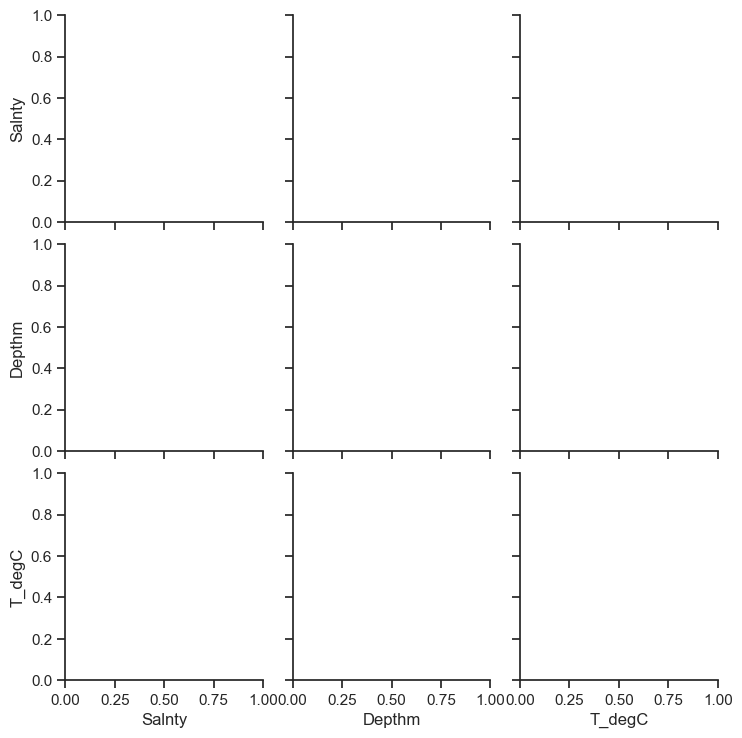

In [45]:
sns.set_theme(style='ticks')
sns.pairplot(data=df_regression)
plt.show()

For the regression model a heatmap can show the correlation between the given features.

<AxesSubplot: >

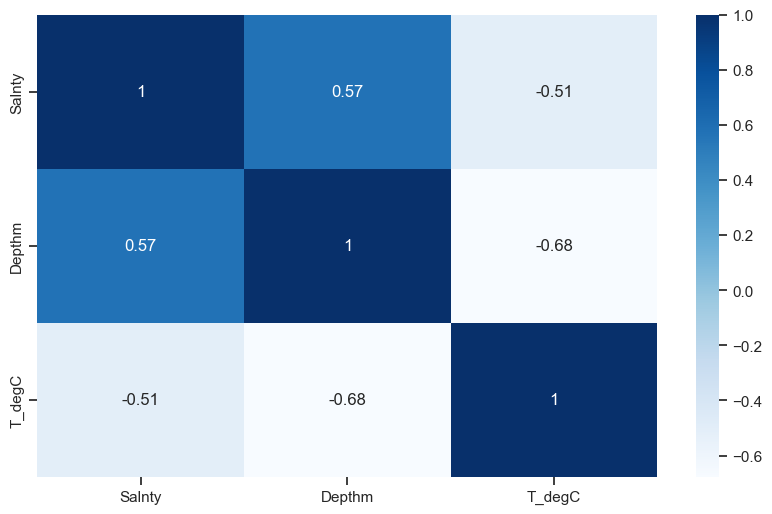

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_regression.corr(), cmap='Blues', annot=True)

## a) Feature engineering